# Tutorial 5 - Python For Data Analysis 🐍 
---
## 📈 Matplotlib & Seaborn 📉

### *Table of Contents*

  - [Exercise 1](#exercise-1) : Matplotlib Basics
  - [Exercise 2](#exercise-2) : Matplotlib's Object Oriented API
  - [Exercise 3](#exercise-3) : Pandas Built-in
  - [Exercise 4](#exercise-4) : Traffic accidents - Seaborn


## Imports

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

<a name="exercise-4">

### PW5: Exercise 4 : Traffic Accidents - Seaborn
---

In EDA (Exploratory Data Analysis), we rarely use matplotlib directly. We use it for highly customized visualizations. For quick plots, we can use pandas built-in plots or use external libraries, like Seaborn.

We can also use more developed libraries like plotly or bokeh, allowing to create interactive visualizations and entire dashboards.

Get the dataframe we used in the previous TP. Don’t forget to add a title, x labels, y labels to every plot you make! Visualizations are used to communicate with people who are nontech- nical and/or who have never seen your data.


https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# don't forget to import mapping.py and vehicules_2016.csv 

In [60]:
df = pd.read_csv("vehicules_2016.csv", encoding="latin1")
df.rename(columns={'senc':'sens_circulation','catv':'cat_vehicule'},inplace=True)
df.head()


,Num_Acc,sens_circulation,cat_vehicule,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


#### 1) Use the dataframe you created on 2.25, representing the relationship between ‘moving obstacles’ and ‘transport vehicles’. Create a dataframe using this data, marking the correlation between each variable in the heatmap. Add a title and change the style of this plot. Here’s an example of the expected output:

In [61]:
data=df.copy()
data.drop(data.index[(data['cat_vehicule'] >40) | (data['cat_vehicule'] <37)], inplace=True)
data.head()

,Num_Acc,sens_circulation,cat_vehicule,occutc,obs,obsm,choc,manv,num_veh
129,201600000083,1.0,39,0,0.0,2.0,3.0,1.0,B02
224,201600000148,0.0,38,0,0.0,1.0,2.0,1.0,A01
278,201600000184,0.0,37,0,1.0,1.0,5.0,16.0,A01
292,201600000193,2.0,38,0,0.0,2.0,3.0,1.0,A01
522,201600000330,0.0,39,1,0.0,2.0,1.0,1.0,B02


In [62]:
info_vehicules = {
0 : "Inconnu",
1 : "Bicyclette",
2 : "Cyclomoteur <50cm3",
3 : "Voiturette (Quadricycle à moteur carrossé) (anciennement voiturette ou tricycle à moteur)",
4 : "Référence plus utilisée depuis 2006 (scooter immatriculé)",
5 : "Référence plus utilisée depuis 2006 (motocyclette)",
6 : "Référence plus utilisée depuis 2006 (side-car)",
7 : "VL seul",
8 : "Catégorie plus utilisée (VL + caravane)",
9 : "Catégorie plus utilisée (VL + remorque)",
10 : "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
11 : "Référence plus utilisée depuis 2006 (VU (10) + caravane)",
12 : "Référence plus utilisée depuis 2006 (VU (10) + remorque)",
13 : "PL seul 3,5T <PTCA <= 7,5T",
14 : "PL seul > 7,5T",
15 : "PL > 3,5T + remorque",
16 : "Tracteur routier seul",
17 : "Tracteur routier + semi-remorque",
18 : "Référence plus utilisée depuis 2006 (transport en commun)",
19 : "Référence plus utilisée depuis 2006 (tramway)",
20 : "Engin spécial",
21 : "Tracteur agricole",
30 : "Scooter < 50 cm3",
31 : "Motocyclette > 50 cm et <= 125 cm",
32 : "Scooter >50cm et<=125cm",
33 : "Motocyclette",
34 : "Scooer",
35 : "Quad",
36 : "Quad lourd > 50 cm (Quadricycle à moteur non carrossé)",
37 : "Autobus",
38 : "Autocar",
39 : "Train",
40 : "Tramway",
99 : "Autre véhicule",
}

obstacle_labels = {
0 : "inconnu_0",
1 : "Piéton",
2 : "Véhicule",
4 : "Véhicule sur rail",
5 : "Animal domestique 6",
6 : "Animal sauvage",
9 : "Autre",
None : "inconnu", 
}

obstacle_fixe_labels = {
1 : "Véhicule en stationnement",
2 : "Arbre",
3 : "Glissière métallique",
4 : "Glissière béton",
5 : "Autre glissière",
6 : "Bâtiment, mur, pile de pont",
7 : "Support de signalisation verticale ou poste d’appel d’urgence ",
8 : "Poteau",
9 : "Mobilier urbain",
10 : "Parapet",
11 : "Ilot, refuge, borne haute",
12 : "Bordure de trottoir",
13 : "Fossé, talus, paroi rocheuse",
14 : "Autre obstacle fixe sur chaussée",
15 : "Autre obstacle fixe sur trottoir ou accotement 16 – Sortie de chaussée sans obstacle",
}

In [63]:
data['cat_vehicule']=data['cat_vehicule'].map(info_vehicules)
data['obs']=data['obs'].map(obstacle_fixe_labels)
data['obsm']=data['obsm'].map(obstacle_labels)

df['cat_vehicule']=df['cat_vehicule'].map(info_vehicules)
df['obs']=df['obs'].map(obstacle_fixe_labels)
df['obsm']=df['obsm'].map(obstacle_labels)

In [64]:
df2=pd.crosstab(data['cat_vehicule'], data['obsm'],values=data['occutc'],aggfunc=np.sum)
df2

obsm,Autre,Piéton,Véhicule,Véhicule sur rail,inconnu_0
cat_vehicule,,,,,
Autobus,126.0,784.0,1313.0,NaN,520.0
Autocar,2.0,210.0,917.0,NaN,256.0
Train,NaN,34.0,187.0,1.0,300.0
Tramway,10.0,883.0,1483.0,0.0,171.0


In [65]:
column_order = ['Véhicule', 'Piéton','inconnu_0','Autre', 'Véhicule sur rail']
df2 = df2[column_order]

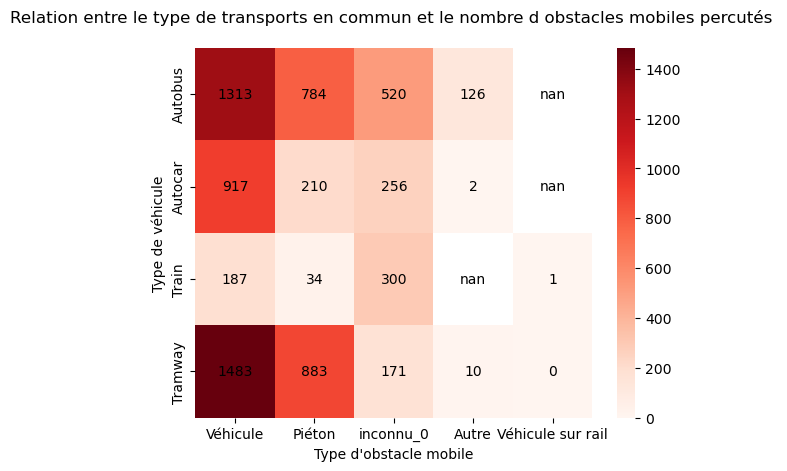

In [82]:
sns.heatmap(df2, cmap = "Reds")
# Obtenez les valeurs et les indices
values = df2.values
rows, cols = df2.shape

# Bouclez sur les données pour afficher les valeurs dans chaque cellule
for i in range(rows):
    for j in range(cols):
        plt.text(j + 0.5, i + 0.5, f'{values[i, j]:.0f}',
                 ha="center", va="center", color="black")

plt.title('Relation entre le type de transports en commun et le nombre d obstacles mobiles percutés \n')
plt.xlabel('Type d\'obstacle mobile')
plt.ylabel('Type de véhicule')
plt.show()


#### 2) Create a pie chart representing the frequency of ‘accident numbers’ by ‘type of moving obstacle’

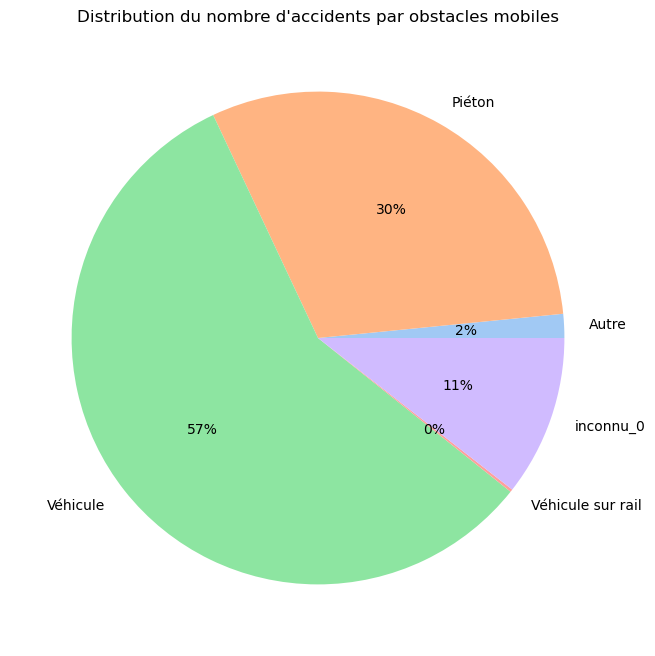

In [83]:
df3=data.groupby('obsm')['Num_Acc'].count()
index = df3.index.tolist()
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8, 8))
plt.pie(df3, labels = index, colors = colors, autopct='%.0f%%')
plt.title("Distribution du nombre d'accidents par obstacles mobiles")
plt.show()

#### 3) Modify the previous plot to have the frequency of the single accident numbers

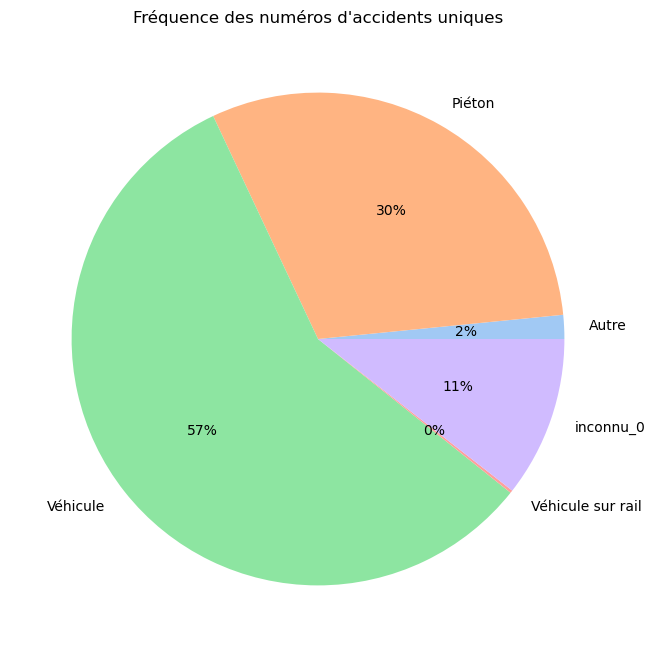

In [85]:
# Count the frequency of each unique accident number
df3=data.groupby('obsm')['Num_Acc'].count()

# Get the index (which now represents unique accident numbers)
index = df3.index.tolist()

# Choose colors for the pie chart
colors = sns.color_palette('pastel')[0:len(index)]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df3, labels=index, colors=colors, autopct='%.0f%%')
plt.title("Fréquence des numéros d'accidents uniques")
plt.show()


#### 4) Calculate the ‘'number of accidents’ per ‘fixed obstacle’. Visualize the result in a horizontal bar chart.

<Axes: xlabel='obs'>

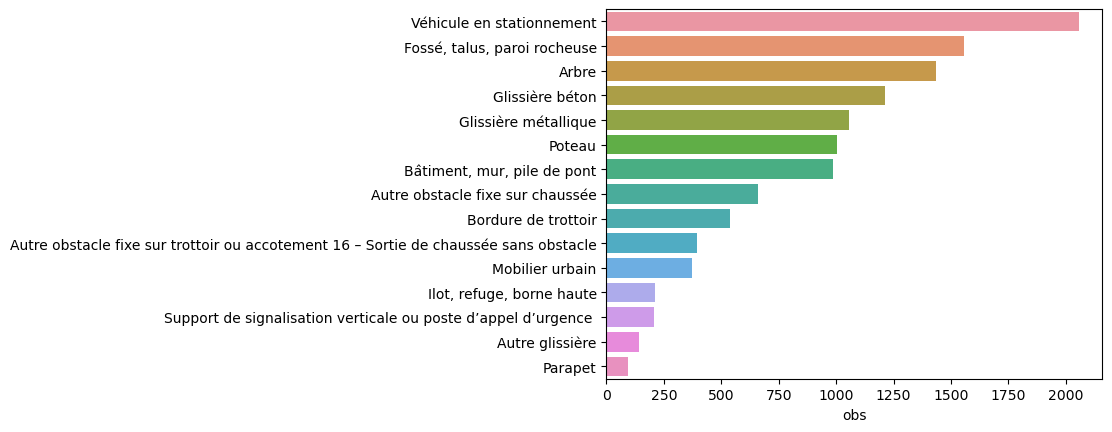

In [69]:
sns.barplot(y=df['obs'].value_counts().index, x=df['obs'].value_counts(), orient='h')

#### 5) Zoom in on the lower part of this graph, keep values less than 1500 only (and if their- values are higher, place it at the maximum of the plot)

<Axes: title={'center': 'Number of accidents per fixed obstacles <1500'}, ylabel='obs'>

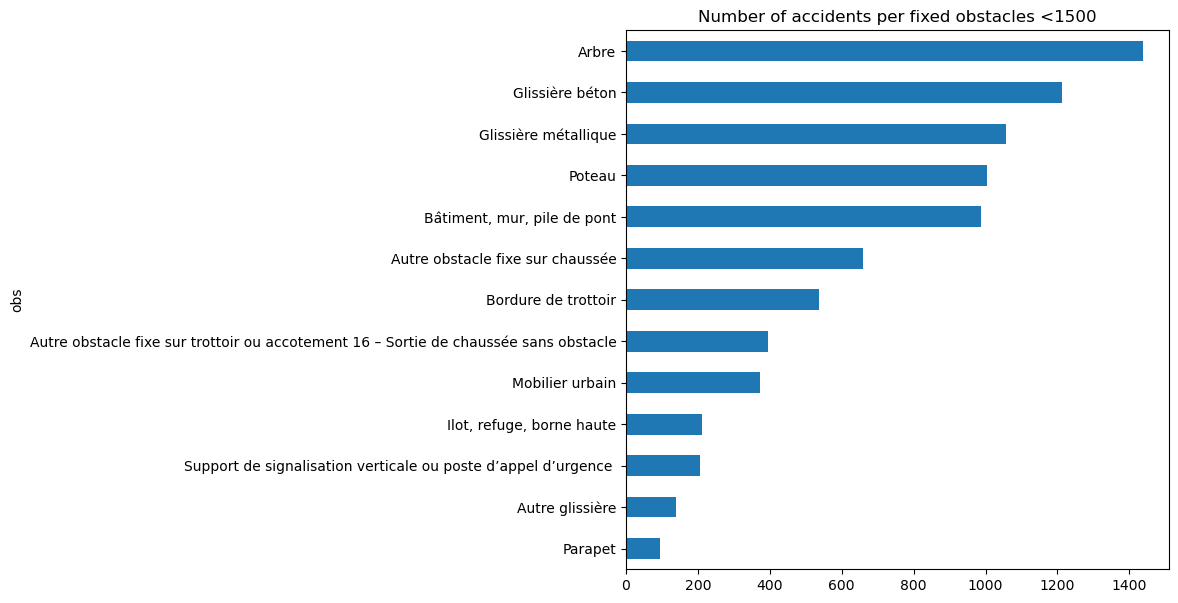

In [70]:
h = df.groupby(['obs']).count().sort_values(by='Num_Acc',ascending=False)
h2= h[h['Num_Acc']<1500]
h2 = h2.sort_values(by='Num_Acc',ascending=True)
h2['Num_Acc'].plot(kind='barh',figsize=(7,7),title='Number of accidents per fixed obstacles <1500')

6) Zoom in to the upper part of this graph, keep values greater than 1500 only (and if their values are lower, remove them from the graph)

<Axes: title={'center': 'Number of accidents per fixed obstacles >1500'}, ylabel='obs'>

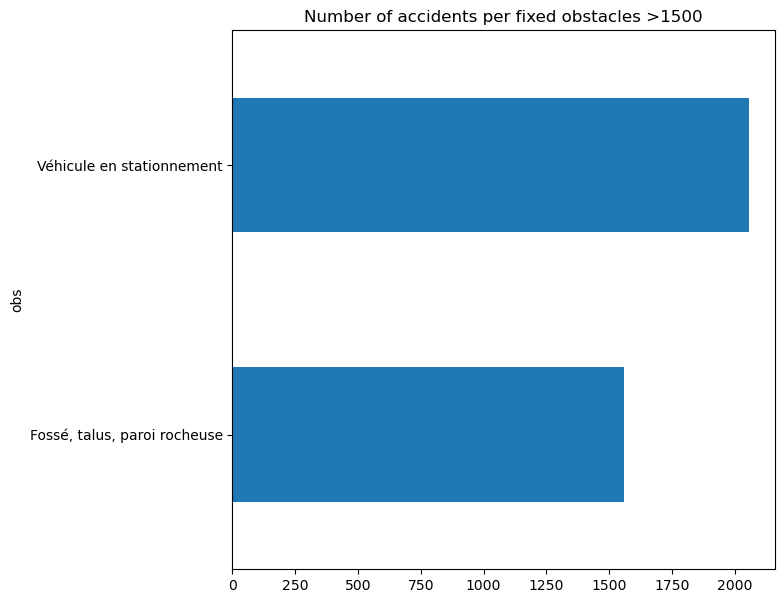

In [71]:
h = df.groupby(['obs']).count().sort_values(by='Num_Acc',ascending=False)
h2= h[h['Num_Acc']>1500]
h2 = h2.sort_values(by='Num_Acc',ascending=True)
h2['Num_Acc'].plot(kind='barh',figsize=(7,7),title='Number of accidents per fixed obstacles >1500')

### Exercise 5 
---

Read the file named characteristics_2016.csv containing the characteristics of each accident. Do not hesitate to go back to the documentation if necessary to better understand the columns

Documentation : https://www.data.gouv.fr/fr/datasets/r/6cade01c-f69d-4779-b0a4- 20606069888f

File path: https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7

In [72]:
carac = pd.read_csv("caracteristiques_2016.csv", encoding="latin1")
carac

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1,6.0,11,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1,3.0,11,rue Joliot curie,M,0.0,0.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59427,201600059428,16,12,1,1201,1,2,1,1,6.0,611,passamanty-Vahib ( rout,NaN,NaN,NaN,976
59428,201600059429,16,12,3,2215,1,2,1,1,7.0,611,mamoudzou centre-Adrian,NaN,NaN,NaN,976
59429,201600059430,16,12,5,1710,1,2,1,1,3.0,611,kaweni-Kaweni sud (Z I),NaN,NaN,NaN,976
59430,201600059431,16,12,6,1005,1,2,3,1,3.0,611,kaweni-Kaweni nord ( Z I,NaN,NaN,NaN,976


#### 1) Create a scatter plot using long and lat columns. Can you recognize the map of France? Maybe by zooming in a bit?

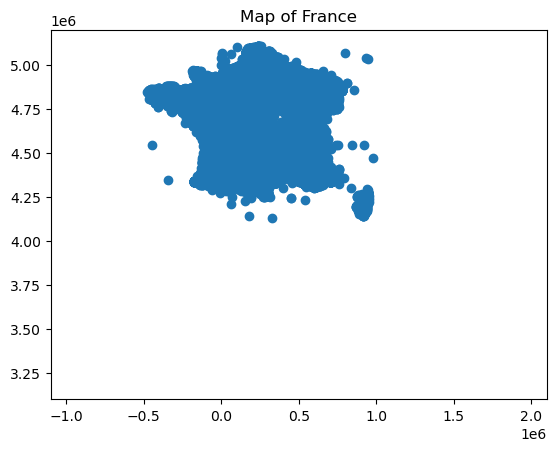

In [73]:
plt.scatter(carac['long'],carac['lat'])
plt.axis([-1.1e6, 2.1e6, 3.1e6, 5.2e6])
plt.title('Map of France')
plt.show()

#### 2) Create a time series graph, representing the evolution of traffic accidents over time. Be specific in your graph (the more details you can provide, the better it will be), while being clear to someone who is seeing it for the first time

<Axes: title={'center': 'Evolution of traffic accidents over time in 2016'}, xlabel='an,mois,jour'>

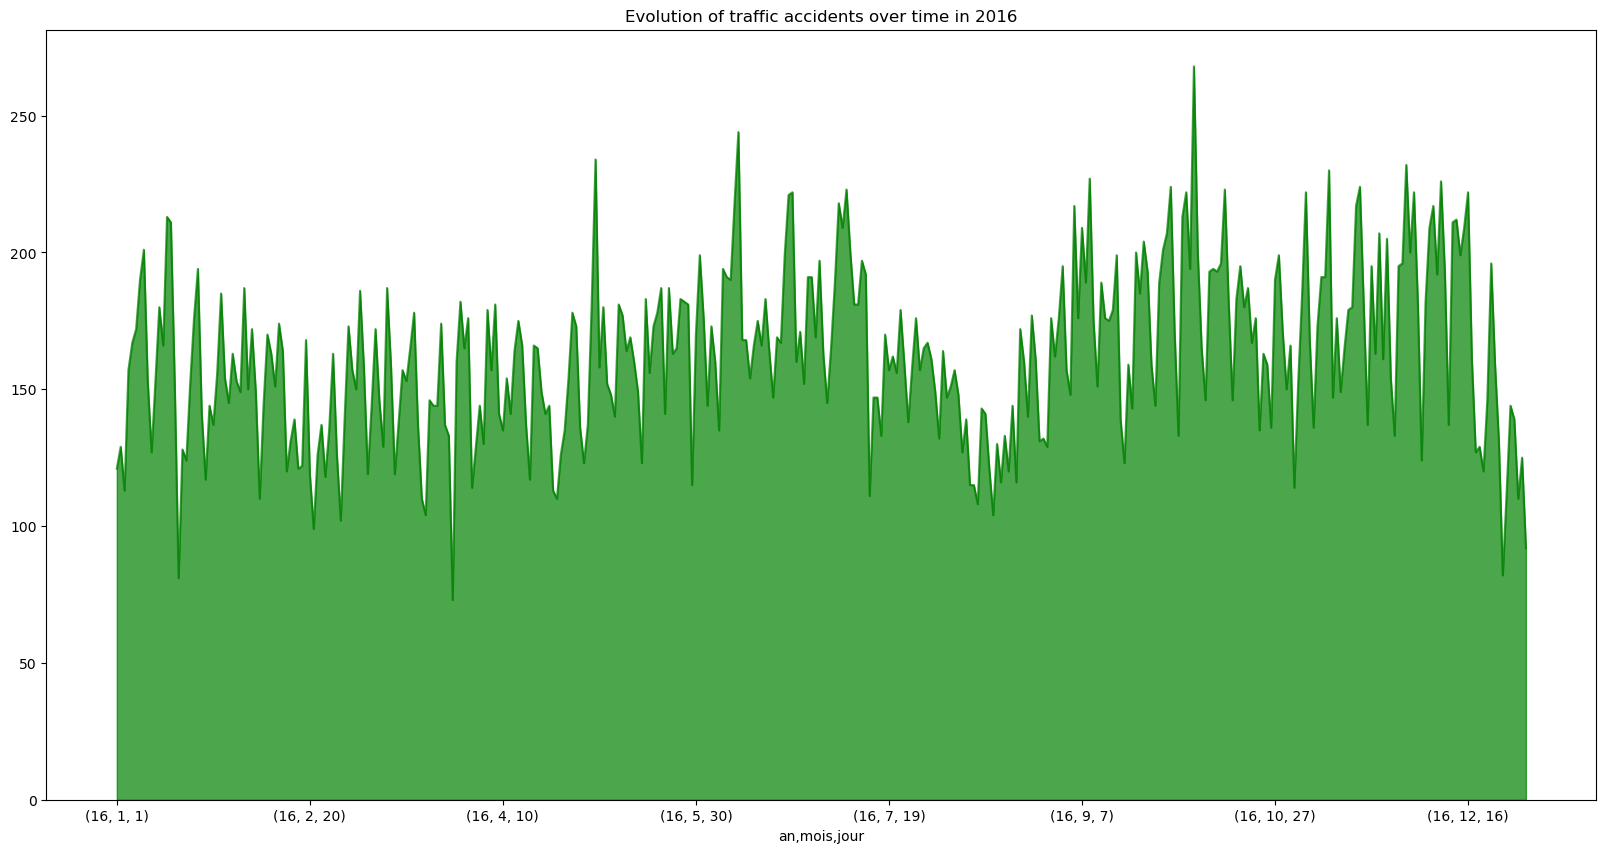

In [74]:
caracPlot = carac.groupby(['an','mois','jour']).count().sort_values(by=['an','mois','jour'],ascending=[True,True,True])
caracPlot['Num_Acc'].plot.area(alpha=0.7,color='green',figsize=(20,10),title='Evolution of traffic accidents over time in 2016')

#### 3) Count and visualize the number of accidents by department. Show the 10 most dan- gerous departments.

In [75]:
caracDep = carac.groupby('dep').count().sort_values(by='Num_Acc',ascending=False)
pd.DataFrame(caracDep['Num_Acc'])

,Num_Acc
dep,
750,6466
130,4110
930,3031
920,2873
940,2721
...,...
700,94
150,92
550,78


#### 4) Create a new column having an explicit weather label. Analyze this new column for more information on accidents. When do they occur?


<Axes: ylabel='Num_Acc'>

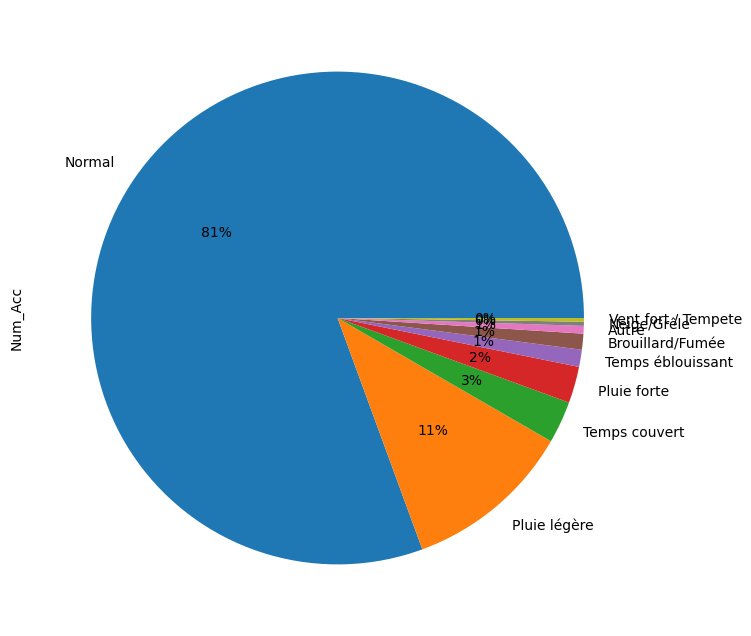

In [76]:
weather = {
None : "Pas renseigné",
0 : "Inconnu",
1 : "Normal",
2 : "Pluie légère",
3 : "Pluie forte",
4 : "Neige/Grêle",
5 : "Brouillard/Fumée",
6 : "Vent fort / Tempete",
7 : "Temps éblouissant",
8 : "Temps couvert",
9 : "Autre",
}
carac['weather'] = carac['atm'].map(weather)
carac2=carac.groupby('weather')['Num_Acc'].count().sort_values(ascending=False)
carac2.plot(kind='pie',figsize=(10,8),autopct='%.0f%%')

80% of the accidents happend when the wheather's normal, so wheather doesn't really influe on the probability of aving an accident. 

#### 5) Create two new columns, the first will contain the hour of the accident, the second will contain the minute. Which hour is the most dangerous for drivers?

In [77]:
def heure(x):
    if len(str(x))==4:
        return int(str(x)[0:2])
    else:
        return int(str(x)[0:1])

def minute(x):
    if len(str(x))==4:
        return int(str(x)[-2:])
    else:
        return int(str(x)[-2:])

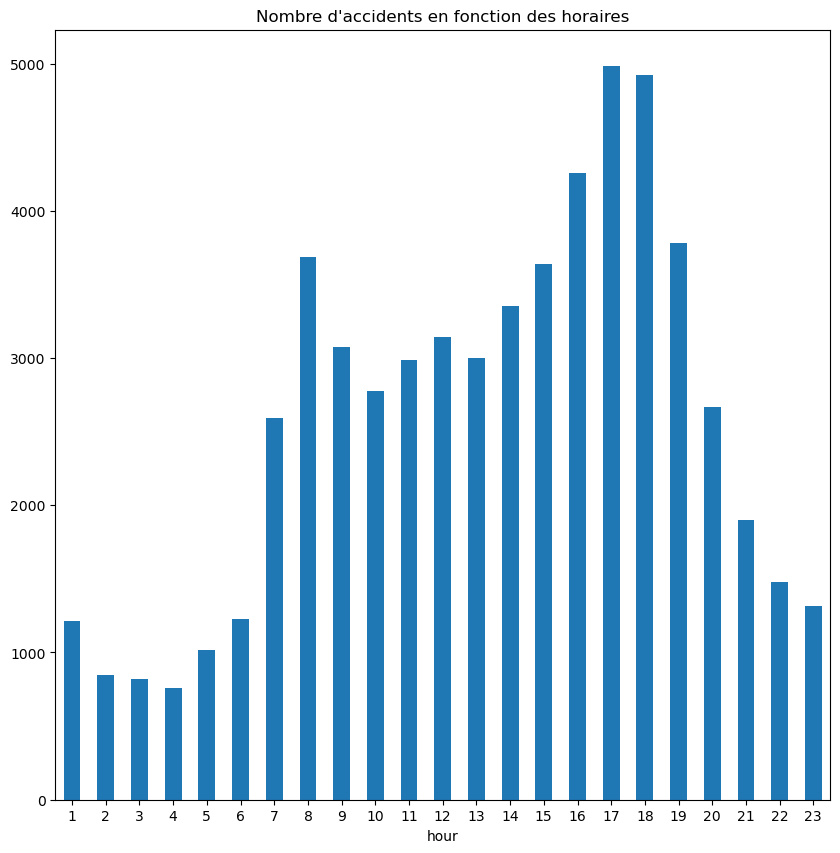

In [91]:
carac['hour']=carac['hrmn'].map(heure)
carac['minute']=carac['hrmn'].map(minute)
a=carac.groupby('hour')['Num_Acc'].count()
a.plot(kind='bar', figsize=(10, 10))
plt.xticks(rotation=0)  # Réglage de l'orientation des étiquettes de l'axe des x
plt.title('Nombre d\'accidents en fonction des horaires')
plt.show()



la majorité des accidents ont lieu dans la journée, en particulier à 17h avec prés de 5000 accidents. 

#### 6) Analyze the most dangerous moment for each department. Does a specific moment stand out?

In [79]:
b=carac.groupby(['dep','hour'])['Num_Acc'].count().sort_values(ascending=False).head(20)
pd.DataFrame(b)

Num_Acc
dep hour         
750 18        450
    17        437
    19        426
    9         399
    16        392
    15        380
    14        367
130 18        362
750 12        358
    13        355
    11        343
    8         337
    20        327
    10        311
130 17        298
    16        283
    8         265
    19        252
920 18        248
130 14        247

For each department, 18 and 17 are the most dangerous hours, certainly because many people finish their jobs at this time.

#### 7) Does Ile-de-France have more accidents than in the provinces? Create a new column and analyze the behavior in each of these two groups (Ile-de-France vs provinces). Remember to also analyze the time of day, the weather, etc.

In [80]:
def idf(x):
    if (x==750 or x==770 or x==780 or x==930 or x==940 or x==950 or x==910 or x==910):
        return True
    else:
        return False

,Num_Acc
idf,
False,42983
True,16449


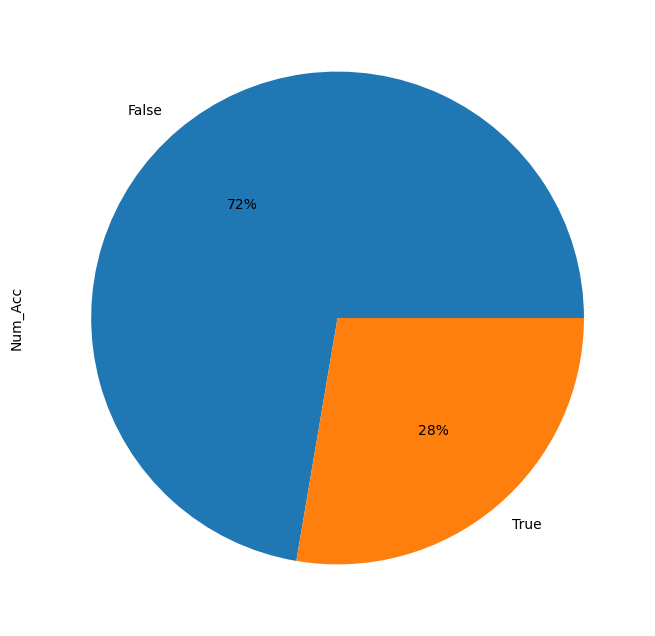

In [81]:
carac['idf']=carac['dep'].map(idf)
c=carac.groupby('idf')['Num_Acc'].count()
c.plot(kind='pie',figsize=(10,8),autopct='%.0f%%')
pd.DataFrame(c)


28% of accidents in France happend in Ile de France

however, there is 68 millions habs in france and 12 millions in ile de france ==> 17,65% of the french pop, so basically it is not such a huge gap,and it can be explained by the density of population, and intensity of the circulation at thos hours .

#### 8) Create a new column representing 4 period of the day. Morning, afternoon, evening, night. Use this new column to analyze any correlations with other columns. Present your results in one or more graphs.

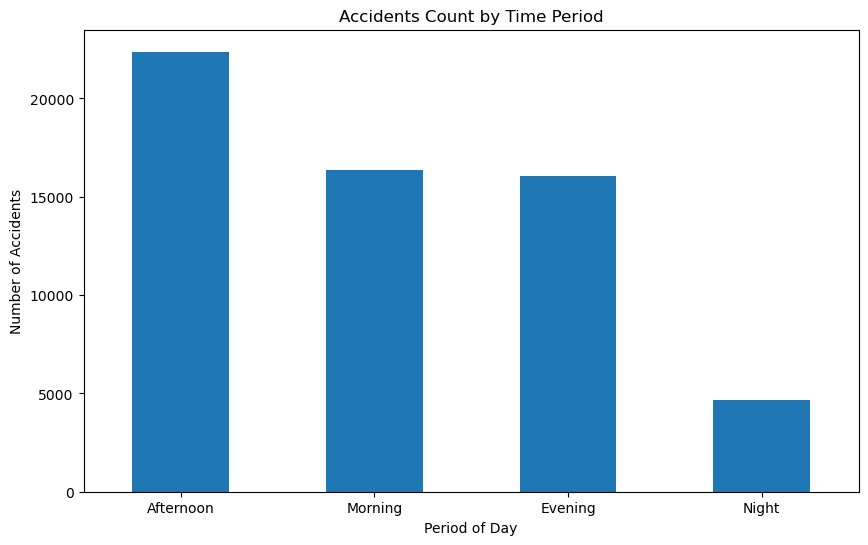

In [92]:
# Function to categorize time of day
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:  # From 0 to 5
        return 'Night'

# Apply the function to create the new column
carac['period_of_day'] = carac['hour'].apply(categorize_time)

# Example of analysis: Count accidents by time period
accident_count = carac['period_of_day'].value_counts()

# Plot the results
accident_count.plot(kind='bar', figsize=(10, 6))
plt.title('Accidents Count by Time Period')
plt.xlabel('Period of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()

# Further analysis can be done based on other columns in the dataset
